<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_2_1010_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <파이썬 머신러닝 완벽 가이드> 9장 p.584-601

# 09 추천 시스템

## 01 추천 시스템의 개요와 배경

### 추천 시스템의 개요

- 추천 시스템의 진정한 묘미는 사용자 자신도 좋아하는지 몰랐던 취향을 시스템이 발견하고 그에 맞는 콘텐츠를 추천해주는 것

### 온라인 스토어의 필수 요소, 추천 시스템

- 한정된 시간이라는 제약을 가진 상황에서 너무 많은 상품과 콘텐츠는 오히려 사용자가 어떤 상품을 골라야 할지에 대한 압박감을 느끼게 만들 수밖에 없는데, 추천 시스템이 이러한 상황을 타개해줌

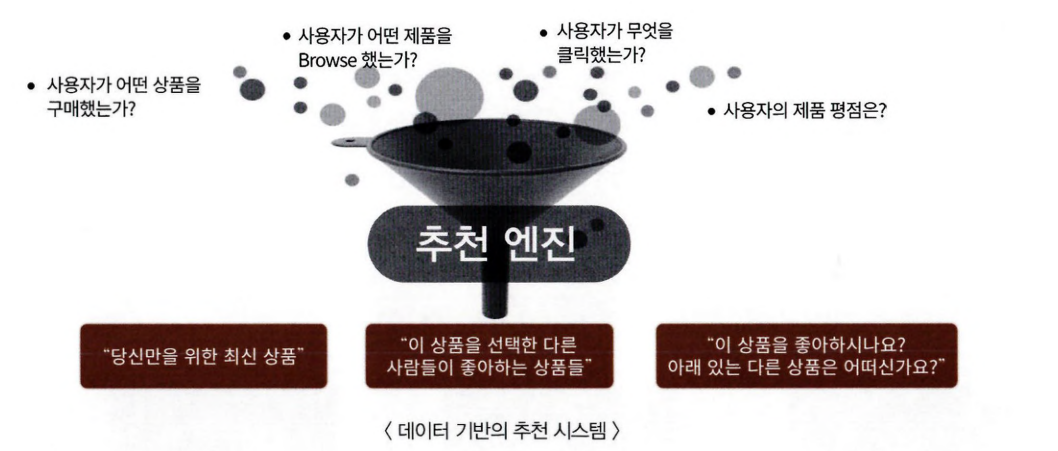

### 추천 시스템의 유형

- 콘텐츠 기반 필터링(Content based filtering) 방식과 협 업 필터 링(Collaborative Filtering) 방식

- 협업 필터링 방식은 다시 최근접 이웃(Nearest Neighbor) 협업 필터링과 잠재 요인(Latent Factor) 협업 필터링

- 추천 시스템의 초창기에는 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링이 주로 사용됐지만, 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템을 적용


## 02 콘텐츠 기반 필터링 추천 시스템

- 사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식

## 03 최근접 이웃 협업 필터링

- 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것

- 목표는 사용자一아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로
아직 평가하지 않은 아이템을 예측 평가

- 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며, 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지해 추천을 수행합

- 협업 필터링 알고리즘에 사용되는 사용자一아이템 평점 행렬에서 행(Row)은 개별 사용자, 열(Column)은 개별 아이템으로 구성되며, 사용자 아이디 행, 아이템 아이디 열 위치에 해당하는 값이 평점을 나타내는 형태가 돼야 함

- 사용자-아이템 평점 행렬은 많은 아이템을 일로 가지는 다차원 행렬, 희소 행렬

- 최근접 이웃 협업 필터링은 메모리(Memory) 협업 필터링이라고도 하며, 일반적으로 사용자 기반과 아이템 기반으로 다시 나뉠 수 있음

- 사용자 기반 최근접 이웃 방식은 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정해 이 Top-N 사용자가 좋아하는 아이템을 추천하는 방식

## 04 잠재 요인 협업 필터링

### 잠재 요인 협업 필터링의 이해

- 아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법

### 행렬 분해의 이해

- 는 다차워의 매트릭스를 저차원 매트릭스로 분해하는 기법으로서 대표적으로 SVD（Singular Vector Decomposition）, NMF（Non—Negative Matrix Factorization） 등이 있음

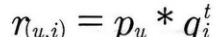

### 확률적 경사 하강법을 이용한 행렬 분해

- P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 아를 유추해내는 것


In [1]:
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 K는 3으로 설정.
R = np.array([[4,np.nan,np.nan,2,np.nan],
              [np.nan,5,np.nan,3,1],
              [np.nan,np.nan,3,4,4],
              [5,2,1,2,np.nan]])
num_users, num_items = R.shape
K = 3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력합니다.
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

In [2]:
from sklearn.metrics import mean_squared_error

def get_rmse(R,P,Q,non_zeros):
  error = 0
  # 두 개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
  full_pred_matrix = np.dot(P,Q.T)

  # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 행렬의 RMSE 추출
  x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
  R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse = mean_squared_error(R_non_zeros,full_pred_matrix_non_zeros)
  rmse = np.sqrt(mse)

  return rmse

In [3]:
# R > 0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장.
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0]

steps = 1000
learning_rate = 0.01
r_lambda = 0.01

# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
  for i,j,r in non_zeros:
    # 실제 값과 예측 값의 차이인 오류 값 구함
    eij = r - np.dot(P[i,:],Q[j,:].T)
    # Regularization을 반영한 SGD 업데이트 공식 적용
    P[i,:] = P[i,:] + learning_rate*(eij * Q[j,:] - r_lambda*P[i,:])
    Q[j,:] = Q[j,:] + learning_rate*(eij * P[i,:] - r_lambda*Q[j,:])

    rmse = get_rmse(R,P,Q,non_zeros)
    if (step % 50) == 0:
      print("### iteration step : ", step, " rmse : ", rmse)

### iteration step :  0  rmse :  3.261355059488935
### iteration step :  0  rmse :  3.26040057174686
### iteration step :  0  rmse :  3.253984404542389
### iteration step :  0  rmse :  3.2521583839863624
### iteration step :  0  rmse :  3.252335303789125
### iteration step :  0  rmse :  3.251072196430487
### iteration step :  0  rmse :  3.2492449982564864
### iteration step :  0  rmse :  3.247416477570409
### iteration step :  0  rmse :  3.241926055455223
### iteration step :  0  rmse :  3.2400454107613084
### iteration step :  0  rmse :  3.240166740749792
### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.5003190892212748
### iteration step :  50  rmse :  0.5001616291326989
### iteration step :  50  rmse :  0.49899601202578087
### iteration step :  50  rmse :  0.4988483450145831
### iteration step :  50  rmse :  0.49895189256631756
### iteration step :  50  rmse :  0.49833236830090993
### iteration step :  50  rmse :  0.4984148489378701
### iterati

In [4]:
pred_matrix = np.dot(P,Q.T)
print('예측 행렬:\n',np.round(pred_matrix,3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
